In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('/content/pp chivay.xlsx')
#reemplazamos los datos que tienen -99.9 con NaN
data.replace(-99.9,np.nan, inplace=True)


In [ ]:
#vemos cuantos valores nulos existen en nuestros datos
data.apply(pd.isnull).sum()/data.shape[0]

año             0.000000
mes             0.000000
dia             0.000000
pp acumulada    0.028108
temp maxima     0.027445
temp minima     0.038434
dtype: float64

In [ ]:
#creeamos una columna llamada fecha para luego convertirlo en nuestro indice
data['fecha'] = data['año'].astype(str) + '-' + data['mes'].astype(str) + '-' + data['dia'].astype(str)
data['fecha'] = pd.to_datetime(data['fecha'], format='%Y-%m-%d')

In [ ]:
#convertimos la columna fecha en nuestro indice
data = data.set_index('fecha')

In [ ]:
#exploramos nuestros datos, buscando donde la columna pp acumulada no tiene datos
data[pd.isnull(data['pp acumulada'])]


,año,mes,dia,pp acumulada,temp maxima,temp minima
fecha,,,,,,
1976-02-01,1976,2,1,NaN,NaN,NaN
1976-02-02,1976,2,2,NaN,NaN,NaN
1976-02-03,1976,2,3,NaN,NaN,NaN
1976-02-04,1976,2,4,NaN,NaN,NaN
1976-02-05,1976,2,5,NaN,NaN,NaN
...,...,...,...,...,...,...
2014-04-26,2014,4,26,NaN,18.4,1.0
2014-04-27,2014,4,27,NaN,20.0,-0.6
2014-04-28,2014,4,28,NaN,21.0,0.2


In [ ]:
data.loc["1976-01-31":"1976-03-01", :]

,año,mes,dia,pp acumulada,temp maxima,temp minima
fecha,,,,,,
1976-01-31,1976,1,31,6.4,16.4,4.4
1976-02-01,1976,2,1,NaN,NaN,NaN
1976-02-02,1976,2,2,NaN,NaN,NaN
1976-02-03,1976,2,3,NaN,NaN,NaN
1976-02-04,1976,2,4,NaN,NaN,NaN
1976-02-05,1976,2,5,NaN,NaN,NaN
1976-02-06,1976,2,6,NaN,NaN,NaN
1976-02-07,1976,2,7,NaN,NaN,NaN
1976-02-08,1976,2,8,NaN,NaN,NaN


In [ ]:
del data['año']

In [ ]:
del data['mes']

In [ ]:
del data['dia']

In [ ]:
#aqui podemos ver que la mayoria de veces no hay precipitacion por lo que podemos completar los valores na con 0
data['pp acumulada'].value_counts()

0.0     13817
0.8       101
0.6       100
1.2        93
1.0        89
        ...  
20.5        1
20.3        1
28.3        1
26.3        1
34.0        1
Name: pp acumulada, Length: 267, dtype: int64

In [ ]:
data['pp acumulada'] = data['pp acumulada'].fillna(0) 

In [ ]:
data[pd.isnull(data['temp maxima'])]

,pp acumulada,temp maxima,temp minima
fecha,,,
1965-05-01,0.0,NaN,NaN
1965-05-02,0.0,NaN,NaN
1965-05-03,0.0,NaN,NaN
1965-05-04,0.0,NaN,NaN
1965-05-05,0.0,NaN,NaN
...,...,...,...
1997-04-04,0.0,NaN,NaN
1998-04-06,0.0,NaN,NaN
2009-06-14,0.0,NaN,-2.0


In [ ]:
data.loc['1965-04-28':'1965-06-01',:]

,pp acumulada,temp maxima,temp minima
fecha,,,
1965-04-28,0.0,19.6,-0.2
1965-04-29,0.0,19.0,-0.3
1965-04-30,0.0,21.0,-0.2
1965-05-01,0.0,NaN,NaN
1965-05-02,0.0,NaN,NaN
1965-05-03,0.0,NaN,NaN
1965-05-04,0.0,NaN,NaN
1965-05-05,0.0,NaN,NaN
1965-05-06,0.0,NaN,NaN


In [ ]:
#se rellena los datos faltantes con el ultimo observado
data = data.fillna(method='ffill')

VERIFYING WE HAVE THE CORRECT DATA TYPES

In [ ]:
data.dtypes

pp acumulada    float64
temp maxima     float64
temp minima     float64
dtype: object

In [ ]:
data.index

DatetimeIndex(['1964-10-01', '1964-10-02', '1964-10-03', '1964-10-04',
               '1964-10-05', '1964-10-06', '1964-10-07', '1964-10-08',
               '1964-10-09', '1964-10-10',
               ...
               '2014-04-21', '2014-04-22', '2014-04-23', '2014-04-24',
               '2014-04-25', '2014-04-26', '2014-04-27', '2014-04-28',
               '2014-04-29', '2014-04-30'],
              dtype='datetime64[ns]', name='fecha', length=18109, freq=None)

ANALYZING OUR WEATHER DATA

<AxesSubplot:xlabel='fecha'>

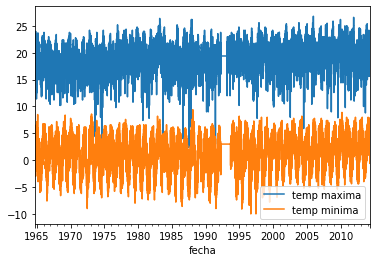

In [ ]:
data[['temp maxima','temp minima']].plot()

<AxesSubplot:xlabel='fecha'>

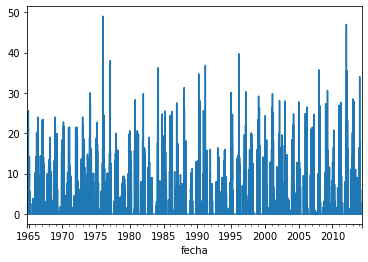

In [ ]:
data['pp acumulada'].plot()

<AxesSubplot:xlabel='fecha'>

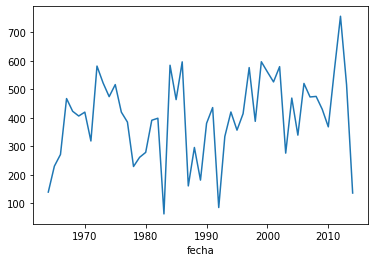

In [ ]:
data.groupby(data.index.year).apply(lambda x: x['pp acumulada'].sum()).plot()

In [ ]:
data.groupby(data.index.year).apply(lambda x: x['pp acumulada'].sum())

fecha
1964    139.4
1965    230.3
1966    271.2
1967    467.4
1968    422.8
1969    406.2
1970    419.8
1971    318.6
1972    581.3
1973    522.3
1974    474.1
1975    516.4
1976    419.8
1977    384.9
1978    229.1
1979    261.3
1980    278.6
1981    391.3
1982    398.4
1983     62.8
1984    584.2
1985    463.7
1986    596.1
1987    161.0
1988    295.8
1989    181.4
1990    380.4
1991    435.8
1992     85.2
1993    334.4
1994    420.3
1995    356.6
1996    414.3
1997    576.0
1998    387.5
1999    596.5
2000    560.6
2001    525.8
2002    579.3
2003    276.0
2004    469.1
2005    339.1
2006    520.4
2007    473.0
2008    474.9
2009    429.9
2010    368.2
2011    567.5
2012    756.1
2013    515.9
2014    136.0
dtype: float64

TRAINING OUR FIRST MACHINE LEARNING MODEL

In [ ]:
#si nosostors queremos predecir la temp max el dia de mañana
#shift lo utilizamos para desplazar los valores de temp max una fila hacia arriba
data['target'] = data.shift(-1)['temp maxima']
data

,pp acumulada,temp maxima,temp minima,target
fecha,,,,
1964-10-01,0.0,18.0,2.2,19.3
1964-10-02,0.0,19.3,1.2,21.3
1964-10-03,0.0,21.3,3.0,20.2
1964-10-04,0.0,20.2,1.0,21.3
1964-10-05,0.0,21.3,6.4,21.3
...,...,...,...,...
2014-04-26,0.0,18.4,1.0,20.0
2014-04-27,0.0,20.0,-0.6,21.0
2014-04-28,0.0,21.0,0.2,20.0


In [ ]:
data = data.iloc[:-1,:].copy()

In [ ]:
data

,pp acumulada,temp maxima,temp minima,target
fecha,,,,
1964-10-01,0.0,18.0,2.2,19.3
1964-10-02,0.0,19.3,1.2,21.3
1964-10-03,0.0,21.3,3.0,20.2
1964-10-04,0.0,20.2,1.0,21.3
1964-10-05,0.0,21.3,6.4,21.3
...,...,...,...,...
2014-04-25,0.0,20.0,2.0,18.4
2014-04-26,0.0,18.4,1.0,20.0
2014-04-27,0.0,20.0,-0.6,21.0


In [ ]:
#usamos regresion lineal regularizada para evitar el sobreajuste de los datos
from sklearn.linear_model import Ridge

reg = Ridge(alpha= .1)


In [ ]:
predictors = ['pp acumulada','temp maxima','temp minima']
train = data.loc[:'2009-12-31']
test = data.loc['2010-01-01':]

In [ ]:
#ajustamos nuestro datos al modelo
#primero pondremos las variabvles que necesitamos para hcer nuestras predicciones
#segundo tendremos la variable objetivo que nuestro modelo tratara de predecir
reg.fit(train[predictors], train["target"]

Ridge(alpha=0.1)

In [ ]:
predictons = reg.predict(test[predictors])

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test['target'], predictons)

1.3608620872583486

EVALUATING OUR MODEL

In [ ]:
combined = pd.concat([test['target'], pd.Series(predictons, index=test.index)], axis = 1)
combined.columns = ['actual','predictions']

In [ ]:
combined

,actual,predictions
fecha,,
2010-01-01,23.0,21.860884
2010-01-02,20.2,21.939180
2010-01-03,20.8,19.996691
2010-01-04,23.4,20.136630
2010-01-05,22.0,22.188936
...,...,...
2014-04-24,20.0,19.800507
2014-04-25,18.4,19.828470
2014-04-26,20.0,18.710588


<AxesSubplot:xlabel='fecha'>

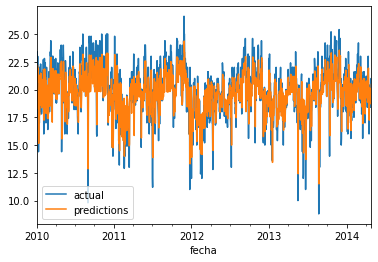

In [ ]:
combined.plot(predictors, df, reg):

In [ ]:
reg.coef_

array([-0.074155  ,  0.6811996 ,  0.02796303])

CREATING A FUNCTION TO MAKE PREDICTIONS

In [ ]:
def create_predictions(predictors, data, reg):
  train = data.loc[:'2009-12-31']
  test = data.loc['2010-01-01':]

  reg.fit(train[predictors], train["target"])
  predictions = reg.predict(test[predictors])

  error = mean_absolute_error(test['target'], predictions)
  combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis = 1)
  combined.columns = ['actual','predictions']
  return error, combined

In [ ]:
data["month_max"] = data['temp maxima'].rolling(30).mean()


In [ ]:
data = data.iloc[30:,:].copy()

In [ ]:
data.loc['1964-10-31':'1964-11-30']

,pp acumulada,temp maxima,temp minima,target,month_max
fecha,,,,,
1964-10-31,14.0,17.4,2.1,16.0,19.856667
1964-11-01,16.0,16.0,5.0,16.0,19.746667
1964-11-02,14.3,16.0,3.0,17.0,19.570000
1964-11-03,1.8,17.0,6.4,16.0,19.463333
1964-11-04,0.0,16.0,5.6,18.0,19.286667
1964-11-05,0.0,18.0,2.0,19.0,19.176667
1964-11-06,0.0,19.0,3.5,18.0,19.136667
1964-11-07,0.0,18.0,2.8,20.0,19.036667
1964-11-08,0.0,20.0,2.5,18.5,18.993333


In [ ]:
#comprobar si hay valores nulos
nulos = data.isnull()
columnas_con_nulos = nulos.any(axis=0)
filas_con_nulos = nulos.any(axis=1)
# tambien si existen valore infinitos
infinitos = np.isinf(data)
columnas_con_infinitos = infinitos.any(axis=0)
filas_con_infinitos = infinitos.any(axis=1)
print('Columnas con valores nulos:')
print(columnas_con_nulos)
print('Filas con valores nulos:')
print(filas_con_nulos)
print('Columnas con valores infinitos:')
print(columnas_con_infinitos)
print('Filas con valores infinitos:')
print(filas_con_infinitos)

Columnas con valores nulos:
pp acumulada     False
temp maxima      False
temp minima      False
target           False
month_max        False
month_day_max    False
max_min          False
dtype: bool
Filas con valores nulos:
fecha
1964-10-31    False
1964-11-01    False
1964-11-02    False
1964-11-03    False
1964-11-04    False
              ...  
2014-04-25    False
2014-04-26    False
2014-04-27    False
2014-04-28    False
2014-04-29    False
Length: 18078, dtype: bool
Columnas con valores infinitos:
pp acumulada     False
temp maxima      False
temp minima      False
target           False
month_max        False
month_day_max    False
max_min           True
dtype: bool
Filas con valores infinitos:
fecha
1964-10-31    False
1964-11-01    False
1964-11-02    False
1964-11-03    False
1964-11-04    False
              ...  
2014-04-25    False
2014-04-26    False
2014-04-27    False
2014-04-28    False
2014-04-29    False
Length: 18078, dtype: bool


In [ ]:
data["month_day_max"] = data['month_max']/ data['temp maxima']

In [ ]:
data["max_min"] = data['temp maxima'] / data['temp minima']

In [ ]:
predictors = ['pp acumulada','temp maxima','temp minima', "month_day_max", "max_min"]

In [ ]:
mask = np.isinf(data)
inf_locations = pd.Series(mask[mask].index.tolist())
inf_locations

0       1964-10-31
1       1964-11-01
2       1964-11-02
3       1964-11-03
4       1964-11-04
           ...    
18073   2014-04-25
18074   2014-04-26
18075   2014-04-27
18076   2014-04-28
18077   2014-04-29
Length: 18078, dtype: datetime64[ns]

In [ ]:
data

,pp acumulada,temp maxima,temp minima,target,month_max,month_day_max,max_min
fecha,,,,,,,
1964-10-31,14.0,17.4,2.1,16.0,19.856667,1.141188,8.285714
1964-11-01,16.0,16.0,5.0,16.0,19.746667,1.234167,3.200000
1964-11-02,14.3,16.0,3.0,17.0,19.570000,1.223125,5.333333
1964-11-03,1.8,17.0,6.4,16.0,19.463333,1.144902,2.656250
1964-11-04,0.0,16.0,5.6,18.0,19.286667,1.205417,2.857143
...,...,...,...,...,...,...,...
2014-04-25,0.0,20.0,2.0,18.4,20.073333,1.003667,10.000000
2014-04-26,0.0,18.4,1.0,20.0,19.986667,1.086232,18.400000
2014-04-27,0.0,20.0,-0.6,21.0,19.986667,0.999333,-33.333333


In [ ]:
error, combined = create_predictions(predictors, data, reg)

In [ ]:
error

1.3273959279458585

<AxesSubplot:xlabel='fecha'>

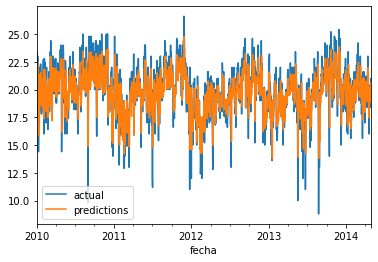

In [ ]:
combined.plot()

In [ ]:
data['monthly_avg'] = data['temp maxima'].groupby(data.index.month).apply(lambda x: x.expanding(1).mean())

In [ ]:
data['day_of_year_avg'] = data['temp maxima'].groupby(data.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [ ]:
predictors = ['pp acumulada','temp maxima','temp minima', "month_day_max", "max_min",'day_of_year_avg','monthly_avg']

In [ ]:
error, combined = create_predictions(predictors, data, reg)

In [ ]:
error

1.3157158326257246

In [ ]:
data.corr()['target']

pp acumulada      -0.234053
temp maxima        0.700639
temp minima        0.013118
target             1.000000
month_max          0.525463
month_day_max     -0.386343
max_min            0.053519
monthly_avg        0.415394
day_of_year_avg    0.448286
Name: target, dtype: float64